# LGBM

In [ ]:
!pip install lightgbm

source: Error encountered while sourcing file '/usr/local/opt/nvm/nvm.sh':
source: No such file or directory
     |████████████████████████████████| 1.2 MB 8.8 MB/s 


In [1]:
import lightgbm as lgbm

from functions import *
from data_loading import load_data

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split


sns.set_theme(style="darkgrid")


In [2]:
flights_test, flights_train = load_data()

## Feature selection with LGBM

In [45]:
training_set = flights_train.sample(200000)

training_set.columns

features_train = ['MONTH', 'DAY', 'DAY_OF_WEEK',
                  'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'TAXI_OUT', 'WHEELS_OFF',
                  'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL',
                  #  'scheduled_departure_date_time',
                  #  'scheduled_departure_date',
                  'scheduled_departure_timestamp',
                  #  'departure_date_time',
                  'departure_timestamp',
                  'initial_delay']

target_train = 'ARRIVAL_DELAY'

categorical_features = ['AIRLINE', 'FLIGHT_NUMBER',
                        'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

X_train, X_val, y_train, y_val = train_test_split(
    training_set[features_train], training_set[target_train], test_size=0.2)

from sklearn.preprocessing import MinMaxScaler

print(X_train.shape)
print(y_train.shape)

y_val = np.reshape([y_val], (-1,1))
y_train = np.reshape([y_train], (-1,1))

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaler.fit(X_val)
X_val = x_scaler.transform(X_val)

x_scaler.fit(X_train)
X_train = x_scaler.transform(X_train)

y_scaler.fit(y_train)
y_train = y_scaler.transform(y_train).flatten()

print(X_train.shape)
print(y_train.shape)


(160000, 13)
(160000,)
(160000, 13)
(160000,)


In [43]:
train_data = lgbm.Dataset(X_train, label=y_train)#, categorical_feature=categorical_features)

test_data = lgbm.Dataset(X_val, label=y_val)#, categorical_feature=categorical_features)

[1]	valid_0's l2: 0.999988
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 0.999989
[3]	valid_0's l2: 0.999989
[4]	valid_0's l2: 0.999989
[5]	valid_0's l2: 0.999989
[6]	valid_0's l2: 0.999989
[7]	valid_0's l2: 0.999989
[8]	valid_0's l2: 0.999989
[9]	valid_0's l2: 0.999989
[10]	valid_0's l2: 0.999989
[11]	valid_0's l2: 0.999989
[12]	valid_0's l2: 0.999989
[13]	valid_0's l2: 0.999989
[14]	valid_0's l2: 0.999989
[15]	valid_0's l2: 0.999989
[16]	valid_0's l2: 0.999989
[17]	valid_0's l2: 0.999989
[18]	valid_0's l2: 0.999989
[19]	valid_0's l2: 0.999989
[20]	valid_0's l2: 0.999989
[21]	valid_0's l2: 0.999989
[22]	valid_0's l2: 0.999989
[23]	valid_0's l2: 0.999989
[24]	valid_0's l2: 0.999989
[25]	valid_0's l2: 0.999989
[26]	valid_0's l2: 0.999989
[27]	valid_0's l2: 0.999989
[28]	valid_0's l2: 0.999989
[29]	valid_0's l2: 0.999989
[30]	valid_0's l2: 0.999989
[31]	valid_0's l2: 0.999989
[32]	valid_0's l2: 0.999989
[33]	valid_0's l2: 0.999989
[34]	valid_0's l2: 0.9

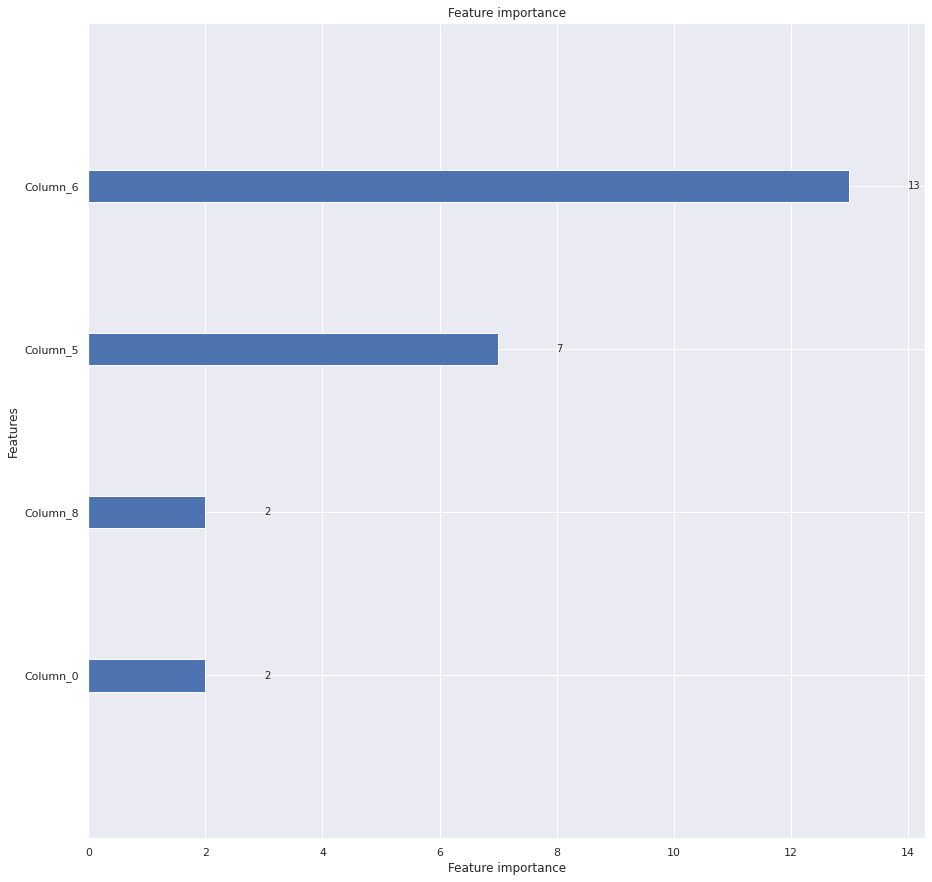

In [46]:
#basic parameter:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'mse',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 25,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=500,
                       early_stopping_rounds=100
                   )


ax = lgbm.plot_importance(model, max_num_features=40, figsize=(15, 15))
plt.show()


## LGBM Regressor

In [38]:
important_features = ['DISTANCE', 'SCHEDULED_TIME', 'initial_delay',
                      'SCHEDULED_ARRIVAL', 'scheduled_departure_timestamp',
                      'TAXI_OUT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
                      'WHEELS_OFF', 'departure_timestamp', 'DAY', 
                      # 'FLIGHT_NUMBER', 'TAIL_NUMBER', 
                      # 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'
                      ]

training_set = flights_train.sample(300000)

X_train, X_val, y_train, y_val = train_test_split(training_set[important_features], training_set['ARRIVAL_DELAY'], test_size=0.2)

# from sklearn.preprocessing import MinMaxScaler

# y_val = np.reshape([y_val], (-1,1))
# y_train = np.reshape([y_train], (-1,1))

# x_scaler = MinMaxScaler()
# y_scaler = MinMaxScaler()

# x_scaler.fit(X_val)
# X_val = x_scaler.transform(X_val)

# x_scaler.fit(X_train)
# X_train = x_scaler.transform(X_train)

# y_scaler.fit(y_train)
# y_train = y_scaler.transform(y_train).flatten()



In [39]:
# {'learning_rate': 0.003, 'max_depth': 25, 'metric': 'mse', 'min_data_in_leaf': 500, 'num_leaves': 35} -> MSE 983.560
# {'learning_rate': 0.005, 'max_depth': 15, 'metric': 'mse', 'min_data_in_leaf': 300, 'num_leaves': 40} -> MSE 719.125
# {'learning_rate': 0.008, 'max_depth': 10, 'metric': 'mse', 'min_data_in_leaf': 150, 'num_leaves': 50} -> MSE 466.621
# {'learning_rate': 0.02, 'max_depth': 9, 'metric': 'mse', 'min_data_in_leaf': 70, 'num_leaves': 70} -> MSE 176.565

hyper_params = {
    'random_state': 420,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['mse'],
    'learning_rate': 0.1,
    "num_leaves": 256,
    'max_depth': 9,
    # 'min_data_in_leaf': 70,
    # "max_bin": 512,
}

train_data = lgbm.Dataset(X_train, label=y_train, categorical_feature='auto')
test_data = lgbm.Dataset(X_val, label=y_val, categorical_feature='auto')

model = lgbm.train(hyper_params, train_data, num_boost_round=500, verbose_eval=False)

## Model Loading and Saving

In [ ]:
import pickle

# save
with open('models/LGBM_MSE_minmax.pkl','wb') as f:
    pickle.dump(model,f)

# # load
# with open('models/LGBM_MSE_94_29.pkl', 'rb') as f:
#     model = pickle.load(f)

## Evaluation

In [40]:
y_pred = model.predict(X_val)
# y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
# y_val = y_val.flatten()

predictions = pd.DataFrame({'predicted': y_pred, 'actual': y_val})

In [41]:
mse(predictions['actual'], predictions['predicted'])
# 94.29060620975959
# 99.96015202124698 (after loading)

94.64192937166169

## Hyperparameter Tuning

In [ ]:
param_grid = {
    'max_depth': [9, 10],
    'min_data_in_leaf': [70, 75],
    # 'feature_fraction': [0.6, 0.8],
    # 'bagging_fraction': [],
    # 'early_stopping_round': [50, 100],
    # 'lambda': [0, 0.5, 1],
    # 'min_gain_to_split': [],
    # 'num_boost_round': [100, 150, 200],
    'learning_rate': [0.01, 0.02],
    'num_leaves': [50, 70],
    'metric': ['mse']
}

CV = GridSearchCV(estimator=lgbm.LGBMRegressor(random_state=420), param_grid=param_grid, cv=5)
CV.fit(X_train, y_train)
print(CV.best_params_)
print(CV.best_score_)

## Creating Submission

In [ ]:
predictions = model.predict(flights_test[important_features])

submission = pd.DataFrame({'id': flights_test['id'], 'ARRIVAL_DELAY': predictions})
submission.to_csv('submissions/submission_6_LGBM.csv', index=False)

# submission must have 514,384 rows
print(len(submission))

514384
